We want to study when Moser performs well on random instances. We want to study whether the region where Moser performs well can be extended using our ML model. A background is provided by: https://people.cs.rutgers.edu/~zz124/alenex17.pdf

Let us start by generating a dataset to train our model on. It should consist of random 3SAT instances with a different $\alpha = \frac{m}{n}$ for various system sizes.

In [1]:
import sys

sys.path.append("../")

from generate_random_instances import generate_dataset_random_KCNF
import numpy as np
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"

num_samples = 5
n_list = [100,200,300]
alpha_list = np.linspace(1, 5, 21)
k = 3
print(alpha_list)

for alpha in alpha_list:
    print("alpha =", alpha)
    generate_dataset_random_KCNF(
        k, n_list, alpha, num_samples, path, vary_percent=0.01, TIMEOUT=1
    )

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5. ]
alpha = 1.0
alpha = 1.2
alpha = 1.4
alpha = 1.6
alpha = 1.8
alpha = 2.0
alpha = 2.2
alpha = 2.4000000000000004
alpha = 2.6
alpha = 2.8
alpha = 3.0
alpha = 3.2
alpha = 3.4000000000000004
alpha = 3.6
alpha = 3.8000000000000003
alpha = 4.0
alpha = 4.2
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1261)
alpha = 4.4
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,439)
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,437)
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,439)
no satisfiable random_KCNF problem found for (n,k,m)=(200,3,878)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1332)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1317)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1328)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1318)
alpha = 4.6
no satisfiable random_KCNF problem found for (n,k,

In [2]:
from generate_random_instances import create_candidates_with_sol
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"
sample_size = 100
threshold = 0.01
create_candidates_with_sol(path, sample_size, threshold)

[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,

Now let us plot the dataset and its characteristics.


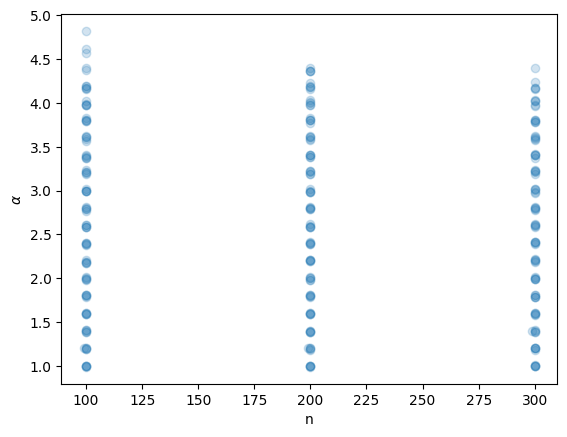

In [7]:
import glob
from pysat.formula import CNF
import matplotlib.pyplot as plt
alpha_values = []
n_values = []
instances = glob.glob(path + "*.cnf")

for g in instances:
    cnf_formula = CNF(from_file=g)
    n = cnf_formula.nv
    m = len(cnf_formula.clauses)
    alpha_values.append(m/n)
    n_values.append(n)

plt.scatter(n_values, alpha_values, alpha=0.2)
plt.xlabel("n")
plt.ylabel(r"$\alpha$")
plt.show()

In [3]:
from evaluate_with_given_params import load_model_and_test_moser_single


data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"
model_path = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval"

total_array = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

problem  1 of  264
problem  2 of  264
problem  3 of  264
problem  4 of  264
problem  5 of  264
problem  6 of  264
problem  7 of  264
problem  8 of  264
problem  9 of  264
problem  10 of  264
problem  11 of  264
problem  12 of  264
problem  13 of  264
problem  14 of  264
problem  15 of  264
problem  16 of  264
problem  17 of  264
problem  18 of  264
problem  19 of  264
problem  20 of  264
problem  21 of  264
problem  22 of  264
problem  23 of  264
problem  24 of  264
problem  25 of  264
problem  26 of  264
problem  27 of  264
problem  28 of  264
problem  29 of  264
problem  30 of  264
problem  31 of  264
problem  32 of  264
problem  33 of  264
problem  34 of  264
problem  35 of  264
problem  36 of  264
problem  37 of  264
problem  38 of  264
problem  39 of  264
problem  40 of  264
problem  41 of  264
problem  42 of  264
problem  43 of  264
problem  44 of  264
problem  45 of  264
problem  46 of  264
problem  47 of  264
problem  48 of  264
problem  49 of  264


In [1]:
from evaluate_with_given_params import load_model_and_test_moser_single
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero"
model_path = "schoening"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval2"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

problem  1 of  2052
schoening
schoening
problem  2 of  2052
schoening
schoening
problem  3 of  2052
schoening
schoening
problem  4 of  2052
schoening
schoening
problem  5 of  2052
schoening
schoening
problem  6 of  2052
schoening
schoening
problem  7 of  2052
schoening
schoening
problem  8 of  2052
schoening
schoening
problem  9 of  2052
schoening
schoening
problem  10 of  2052
schoening
schoening
problem  11 of  2052
schoening
schoening
problem  12 of  2052
schoening
schoening
problem  13 of  2052
schoening
schoening
problem  14 of  2052
schoening
schoening
problem  15 of  2052
schoening
schoening
problem  16 of  2052
schoening
schoening
problem  17 of  2052
schoening
schoening
problem  18 of  2052
schoening
schoening
problem  19 of  2052
schoening
schoening
problem  20 of  2052
schoening
schoening
problem  21 of  2052
schoening
schoening
problem  22 of  2052
schoening
schoening
problem  23 of  2052
schoening
schoening
problem  24 of  2052
schoening
schoening
problem  25 of  2052
scho

In [1]:
from evaluate_with_given_params import load_model_and_test_moser_single

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "../../experiments/params_save/random_3SAT20230530-134743.npy"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "random_3SAT20230530-134743_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)


data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "uniform"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "uniform_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "schoening"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "schoening_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

VCG
problem  1 of  3
problem  2 of  3
problem  3 of  3
problem  1 of  3
problem  2 of  3
problem  3 of  3
problem  1 of  3
problem  2 of  3
problem  3 of  3


/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/random_KCNF3_300_1044_4454289_sol.pkl


In [4]:

from evaluate_with_given_params import load_model_and_test_moser_single

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
model_paths = ["uniform"
               ]

#model_paths = ["/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230530-214741.npy",
#               "/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230531-032807.npy",
#               "/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230531-113933.npy"
#                ]
N_STEPS_MOSER = 10000
N_RUNS_MOSER = 5
for model_path in model_paths:
    path_save = data_path + model_path.split("/")[-1]
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/benchmark_LCG_right_inv_temp_3SAT20230602-150818.npy
VCG
problem  1 of  156
problem  2 of  156
problem  3 of  156
problem  4 of  156
problem  5 of  156
problem  6 of  156
problem  7 of  156
problem  8 of  156
problem  9 of  156
problem  10 of  156
problem  11 of  156
problem  12 of  156
problem  13 of  156
problem  14 of  156
problem  15 of  156
problem  16 of  156
problem  17 of  156
problem  18 of  156
problem  19 of  156
problem  20 of  156
problem  21 of  156
problem  22 of  156
problem  23 of  156
problem  24 of  156
problem  25 of  156
problem  26 of  156
problem  27 of  156
problem  28 of  156
problem  29 of  156
problem  30 of  156
problem  31 of  156
problem  32 of  156
problem  33 of  156
problem  34 of  156
problem  35 of  156
problem  36 of  156
problem  37 of  156
problem  38 of  156
problem  39 of  156
problem  40 of  156
problem  41 of  156
problem  42 o

In [5]:

from evaluate_with_given_params import load_model_and_test_moser_single

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#model_paths = ["/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230530-122213.npy",
#               "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230530-155713.npy",]
#model_paths = ["/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/GIT_SAT_ML3/ml_based_sat_solver/experiments/params_save/benchmark_LCG_right_inv_temp_3SAT20230530-214741.npy",
#               "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/GIT_SAT_ML3/ml_based_sat_solver/experiments/params_save/benchmark_LCG_right_inv_temp_3SAT20230531-032807.npy"]
model_paths = [#"/Users/p403830/Downloads/aws_params/benchmark_LCG_right_layer_number_3SAT20230602-232048.npy",
               #"/Users/p403830/Downloads/aws_params/benchmark_LCG_right_layer_number_3SAT20230602-220634.npy",
                #"/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230608-173245.npy",
                #"/Users/p403830/Downloads/aws_params/benchmark_LCG_right_layer_number_3SAT_LLL20230609-113632.npy",
                "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230608-202600.npy",
                "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230608-151532.npy",
               #"/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/benchmark_LCG_right_layer_number_3SAT_LLL20230604-103604.npy",
               ]

#model_pacd .ths = ["/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230530-214741.npy",
#               "/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230531-032807.npy",
#               "/Users/p403830/Downloads/aws_params/benchmark_LCG_right_inv_temp_3SAT20230531-113933.npy"
#                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    path_save = data_path + model_path.split("/")[-1]
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/benchmark_LCG_VCG_3SAT20230608-202600.npy
VCG
problem  1 of  156


KeyboardInterrupt: 

In [5]:
from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"


model_path = "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser"
else:
        path_save = data_path + model_path + "moser"
print(path_save)

total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/new_random_3SAT220230726-062137moser
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_params/new_rando

In [6]:
from evaluate_with_given_params import load_model_and_test_probsat_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"


model_path = "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 10
if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "probsat"
else:
        path_save = data_path + model_path + "probsat"
print(path_save)

total_array2 = load_model_and_test_probsat_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/new_random_3SAT220230726-062137probsat
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  2 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  3 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  4 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  5 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  6 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  7 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  8 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
probsat
problem  9 of  2052
/Users/p

In [7]:
from evaluate_with_given_params import load_model_and_test_probsat_single_two_models

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"


model_path = "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy"
model_path_u = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 10
if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "probsat_uniform_resampling"
else:
        path_save = data_path + model_path + "probsat_uniform_resampling"
print(path_save)

total_array2 = load_model_and_test_probsat_single_two_models(
        data_path, model_path, model_path_u, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/new_random_3SAT220230726-062137probsat_uniform_resampling
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  2 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  3 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  4 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  5 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  6 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  7 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
probsat
problem  8 of  2052
/Users/p403830/Downloads/aws_para

In [1]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser"
    else:
        path_save = data_path + model_path + "moser"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/LLL_2_norm20230801-103818moser
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm20230801-103818.npy
moser
problem  10 of  156
/Users/

In [8]:

from evaluate_with_given_params import load_model_and_test_probsat_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = ["/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy"
                ]
N_STEPS_MOSER = 5000000
N_RUNS_MOSER = 10
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_probsat_TEST_NEWWWW_10_7"
    else:
        path_save = data_path + model_path + "version_probsat_TEST_NEWWWW_10_7"
    print(path_save)

    total_array2 = load_model_and_test_probsat_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/benchmark_LCG_VCG_3SAT20230601-101328version_probsat_TEST_NEWWWW_10_7
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  2 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  3 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  4 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  5 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  6 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  7 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  8 of  2052
/Users/p403830/Downloads/aws_params

: 

: 

In [1]:



from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
                "uniform",
                "/Users/p403830/Downloads/aws_params/new_random_3SAT20230713-113031.npy",
                "/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-185249.npy",
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_new_random_3SAT"
    else:
        path_save = data_path + model_path + "version_new_random_3SAT"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/uniformversion_new_random_3SAT
problem  1 of  156
uniform
moser
problem  2 of  156
uniform
moser
problem  3 of  156
uniform
moser
problem  4 of  156
uniform
moser
problem  5 of  156
uniform
moser
problem  6 of  156
uniform
moser
problem  7 of  156
uniform
moser
problem  8 of  156
uniform
moser
problem  9 of  156
uniform
moser
problem  10 of  156
uniform
moser
problem  11 of  156
uniform
moser
problem  12 of  156
uniform
moser
problem  13 of  156
uniform
moser
problem  14 of  156
uniform
moser
problem  15 of  156
uniform
moser
problem  16 of  156
uniform
moser
problem  17 of  156
uniform
moser
problem  18 of  156
uniform
moser
problem  19 of  156
uniform
moser
problem  20 of  156
uniform
moser
problem  21 of  156
uniform
moser
problem  22 of  156
uniform
moser
problem  23 of  156
uniform
moser
problem  24 of  156
uniform
moser
problem  25 of  156
uniform
moser
problem  

In [1]:
        
from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
                "/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy",
                "/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-095319.npy",
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_new_random_3SAT_vary_zero"
    else:
        path_save = data_path + model_path + "version_new_random_3SAT_vary_zero"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/new_random_3SAT20230712-111354version_new_random_3SAT_vary_zero
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  2 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  3 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  4 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  5 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  6 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  7 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  8 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-111354.npy
moser
problem  9 of  2052
/Users/

In [1]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
model_paths = ["/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy",
                ]

N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_moser4"
    else:
        path_save = data_path + model_path + "version_moser4"
    print(path_save)

    total_array2 = load_model_and_test_probsat_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/benchmark_LCG_VCG_3SAT20230601-101328version_moser4
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  2 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  3 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  4 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  5 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  6 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  7 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  8 of  2052
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-

KeyboardInterrupt: 

In [3]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
model_paths = ["schoening"]

N_STEPS_MOSER = 10000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_moser"
    else:
        path_save = data_path + model_path + "version_moser"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/schoeningversion_moser
problem  1 of  156
schoening
schoening
problem  2 of  156
schoening
schoening
problem  3 of  156
schoening
schoening
problem  4 of  156
schoening
schoening
problem  5 of  156
schoening
schoening
problem  6 of  156
schoening
schoening
problem  7 of  156
schoening
schoening
problem  8 of  156
schoening
schoening
problem  9 of  156
schoening
schoening
problem  10 of  156
schoening
schoening
problem  11 of  156
schoening
schoening
problem  12 of  156
schoening
schoening
problem  13 of  156
schoening
schoening
problem  14 of  156
schoening
schoening
problem  15 of  156
schoening
schoening
problem  16 of  156
schoening
schoening
problem  17 of  156
schoening
schoening
problem  18 of  156
schoening
schoening
problem  19 of  156
schoening
schoening
problem  20 of  156
schoening
schoening
problem  21 of  156
schoening
schoening
problem  22 of  156
schoeni

In [2]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Downloads/samples_random_3SAT/"
model_paths = ["schoening"]

N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_schoening"
    else:
        path_save = data_path + model_path + "version_schoening"
    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

problem  1 of  264
schoening
schoening
problem  2 of  264
schoening
schoening
problem  3 of  264
schoening
schoening
problem  4 of  264
schoening
schoening
problem  5 of  264
schoening
schoening
problem  6 of  264
schoening
schoening
problem  7 of  264
schoening
schoening
problem  8 of  264
schoening
schoening
problem  9 of  264
schoening
schoening
problem  10 of  264
schoening
schoening
problem  11 of  264
schoening
schoening
problem  12 of  264
schoening
schoening
problem  13 of  264
schoening
schoening
problem  14 of  264
schoening
schoening
problem  15 of  264
schoening
schoening
problem  16 of  264
schoening
schoening
problem  17 of  264
schoening
schoening
problem  18 of  264
schoening
schoening
problem  19 of  264
schoening
schoening
problem  20 of  264
schoening
schoening
problem  21 of  264
schoening
schoening
problem  22 of  264
schoening
schoening
problem  23 of  264
schoening
schoening
problem  24 of  264
schoening
schoening
problem  25 of  264
schoening
schoening
problem  

In [2]:

from evaluate_with_given_params import load_model_and_test_moser_single

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
model_paths = ["schoening"]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    path_save = data_path + model_path.split("/")[-1] + "2"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zeroschoening2
problem  1 of  2052
schoening
schoening
problem  2 of  2052
schoening
schoening
problem  3 of  2052
schoening
schoening
problem  4 of  2052
schoening
schoening
problem  5 of  2052
schoening
schoening
problem  6 of  2052
schoening
schoening
problem  7 of  2052
schoening
schoening
problem  8 of  2052
schoening
schoening
problem  9 of  2052
schoening
schoening
problem  10 of  2052
schoening
schoening
problem  11 of  2052
schoening
schoening
problem  12 of  2052
schoening
schoening
problem  13 of  2052
schoening
schoening
problem  14 of  2052
schoening
schoening
problem  15 of  2052
schoening
schoening
problem  16 of  2052
schoening
schoening
problem  17 of  2052
schoening
schoening
problem  18 of  2052
schoening
schoening
problem  19 of  2052
schoening
schoening
problem  20 of  2052
schoening
schoening
problem  21 of  2052
schoening
schoening
problem  